In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df = df.drop(columns=['Cabin'])

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-6-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

<ipython-input-8-9dc7dc41aa02>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#drop name and ticket class as they dont yield any useful info
df = df.drop(columns=['Name','Ticket','PassengerId'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

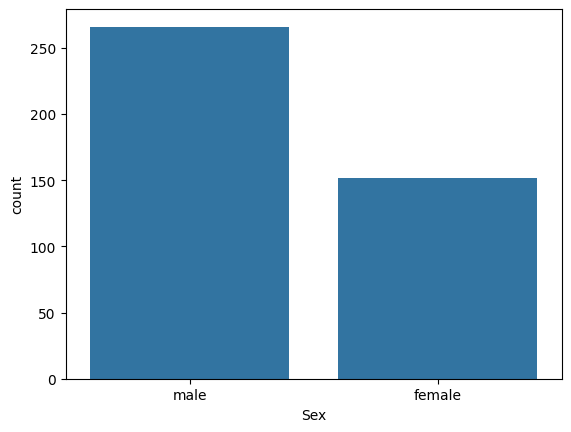

In [ ]:
#checking # of males and females in dataset
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

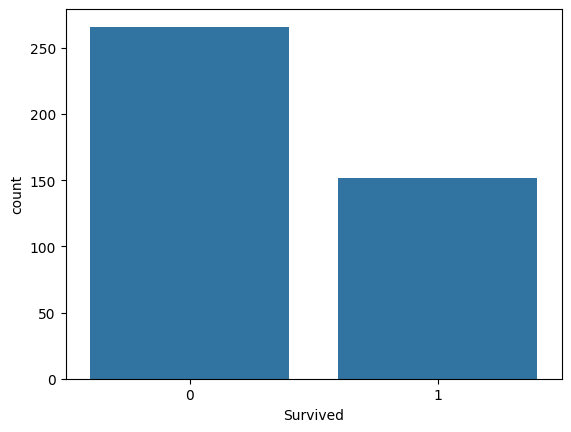

In [ ]:
sns.countplot(x='Survived',data=df)

In [5]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [ ]:
#one hot encode the Pclass and embarked column
df = pd.get_dummies(df,columns=['Embarked','Pclass'])

In [ ]:
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_model = LogisticRegressionCV()

In [ ]:
log_model.fit(X_train_scaled,y_train)

LogisticRegressionCV()

In [ ]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
log_model.coef_

array([[ 1.85162076e+00, -1.46621945e-02,  5.84428781e-02,
         7.48851253e-02,  1.00189760e-01, -2.11853555e-02,
         1.16093932e-01, -5.78293134e-02,  6.58143692e-02,
         8.07573162e-04, -5.83034080e-02]])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
y_pred = log_model.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[50,  0],
       [ 0, 34]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
import numpy as np

# Test input features (each row is one passenger)
test_data = np.array([
    [1, 25, 0, 0, 80, 0, 0, 1, 1, 0, 0],
    [0, 30, 1, 0, 13, 0, 1, 0, 0, 0, 1],
    [1, 22, 0, 1, 26, 1, 0, 0, 0, 1, 0],
    [0, 40, 0, 0, 7, 0, 0, 1, 0, 0, 1],
    [1, 35, 1, 1, 120, 0, 0, 1, 1, 0, 0]
])

# Scale using the same scaler used during training
test_data_scaled = scaler.transform(test_data)

# Predict
predictions = log_model.predict(test_data_scaled)
print("Predictions:", predictions)  # 0 = did not survive, 1 = survived


Predictions: [1 0 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
n_estimators = [64,100,128,200]
max_features = [2,3,4,5]
oob_score = [True,False]
bootstrap = [True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'oob_score':oob_score,'bootstrap':bootstrap}

In [ ]:
grid = GridSearchCV(rfc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueError("Out of bag

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
confusion_matrix(y_test,predictions)

array([[50,  0],
       [ 0, 34]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
import numpy as np

# Test input features (each row is one passenger)
test_data = np.array([
    [1, 25, 0, 0, 80, 0, 0, 1, 1, 0, 0],
    [0, 30, 1, 0, 13, 0, 1, 0, 0, 0, 1],
    [1, 22, 0, 1, 26, 1, 0, 0, 0, 1, 0],
    [0, 40, 0, 0, 7, 0, 0, 1, 0, 0, 1],
    [1, 35, 1, 1, 120, 0, 0, 1, 1, 0, 0]
])

# Predict
predictions = grid.predict(test_data)
print("Predictions:", predictions)  # 0 = did not survive, 1 = survived


Predictions: [1 0 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [6]:
(df['Sex'] == df['Survived']).all()

np.True_

In [7]:
#Note: In this dataset , only females have survived thus we are getting an accuracy of 1.0 as the Sex and Survived columns
#are exactly the same if we map males - 0 and females - 1